<a href="https://colab.research.google.com/github/Arthur-Barreto/Machine-Vision/blob/main/VisComp_Class_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 8: Training Parameters

## Preliminaries

Run the cell below to download the class pack.

In [1]:
import gdown

gdown.download(id='1UJQowByeR5rJ53G7LXPDHMSUI27ko_OR')

!unzip -o '08.zip'
!rm '08.zip'

Downloading...
From: https://drive.google.com/uc?id=1UJQowByeR5rJ53G7LXPDHMSUI27ko_OR
To: /content/08.zip
100%|██████████| 1.10k/1.10k [00:00<00:00, 2.87MB/s]

Archive:  08.zip
  inflating: sdx.py                  


Run the cell below to import the class modules.

If you get import warnings, try using **Ctrl+m .** (notice there is a dot there) to restart the kernel.

In [3]:
from sdx import *
from tensorflow import keras

## Loading and preparing the MNIST dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
train_images = train_images.astype(float) / 255
test_images = test_images.astype(float) / 255

In [6]:
inputs = keras.Input(shape=(28, 28, 1))

In [7]:
def compile_model(inputs, outputs):
  model = keras.Model(inputs, outputs)
  model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True))
  return model

## Training and evaluating the neural network

In [19]:
layer = keras.layers.Conv2D(3, 3, use_bias=False)
outputs = layer(inputs)

layer = keras.layers.Flatten()
outputs = layer(outputs)

layer = keras.layers.Dense(10)
outputs = layer(outputs)

model = compile_model(inputs, outputs)

model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 3)         27        
                                                                 
 flatten_8 (Flatten)         (None, 2028)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                20290     
                                                                 
Total params: 20317 (79.36 KB)
Trainable params: 20317 (79.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3861 - val_loss: 0.3068
Epoch 2/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3076 - val_loss: 0.2924
Epoch 3/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2919 - val_loss: 0.2790
Epoch 4/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2840 - val_loss: 0.2780
Epoch 5/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2778 - val_loss: 0.2736
Epoch 6/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2729 - val_loss: 0.2745
Epoch 7/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2689 - val_loss: 0.2734
Epoch 8/50
1500/1500 [==============================] - 13s 8ms/step - loss: 0.2661 - val_loss: 0.2784
Epoch 9/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2638 - val_loss: 0.2754
Epoch 10/50
1500/1500 [==============================] - 12s 8ms/step - l

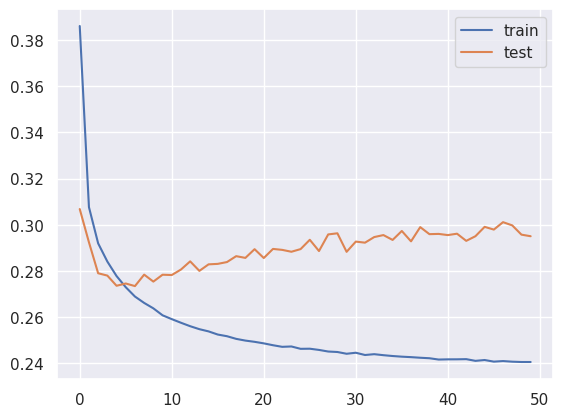

In [20]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=50, validation_split=0.2)
plot_loss(history)

You can click on the toc.png tab to the left to browse by section.